In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data

In [2]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fba3d465390>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
# print(X['train'])
# print(y['train'])

regressor.fit(X['train'], y['train'], 
              monitors=[validation_monitor], 
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-10000
INFO:tensorflow:Saving checkpoints for 10001 into ./ops_logs/sin/model.ckpt.
INFO:tensorflow:loss = 0.000137289, step = 10001
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit

INFO:tensorflow:global_step/sec: 743.378
INFO:tensorflow:loss = 0.000142178, step = 13501 (0.135 sec)
INFO:tensorflow:global_step/sec: 833.298
INFO:tensorflow:loss = 0.000140174, step = 13601 (0.120 sec)
INFO:tensorflow:global_step/sec: 898.571
INFO:tensorflow:loss = 0.000162076, step = 13701 (0.111 sec)
INFO:tensorflow:global_step/sec: 890.329
INFO:tensorflow:loss = 0.000141107, step = 13801 (0.112 sec)
INFO:tensorflow:global_step/sec: 840.795
INFO:tensorflow:loss = 0.000148568, step = 13901 (0.119 sec)
INFO:tensorflow:global_step/sec: 891.616
INFO:tensorflow:loss = 0.000147674, step = 14001 (0.112 sec)
INFO:tensorflow:global_step/sec: 858.73
INFO:tensorflow:loss = 0.000167447, step = 14101 (0.116 sec)
INFO:tensorflow:global_step/sec: 852.726
INFO:tensorflow:loss = 0.000148341, step = 14201 (0.117 sec)
INFO:tensorflow:global_step/sec: 890.354
INFO:tensorflow:loss = 0.00015189, step = 14301 (0.112 sec)
INFO:tensorflow:global_step/sec: 890.456
INFO:tensorflow:loss = 0.000145924, step = 

SKCompat()

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-20000
MSE: 0.000142


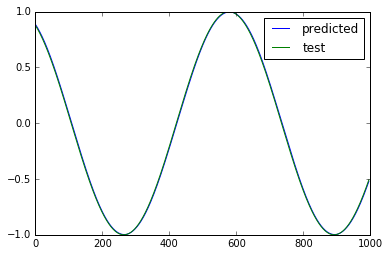

In [6]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])